In [1]:
import tensorflow as tf

#sess = tf.InteractiveSession()

#image = tf.image.decode_image(image_string, channels=3)

# the images must have the ssame size
def create_patches(imgs, w, h, sx, sy):
    # The size of sliding window
    ksizes = [1, w, h, 1] 

    # How far the centers of 2 consecutive patches are in the image
    strides = [1, sx, sy, 1]

    # The document is unclear. However, an intuitive example posted on StackOverflow illustrate its behaviour clearly. 
    # http://stackoverflow.com/questions/40731433/understanding-tf-extract-image-patches-for-extracting-patches-from-an-image
    rates = [1, 1, 1, 1] # sample pixel consecutively

    # padding algorithm to used
    padding='VALID' # or 'SAME'

    #img = tf.expand_dims(imgs, 1)
    image_patches = tf.image.extract_patches(imgs, ksizes, strides, rates, padding)
    
    return image_patches

def read_images(files):
    images = []
    for file in files:
        image = tf.io.read_file(file)
        image = tf.io.decode_jpeg(image)
        images.append(image)
    return images

In [2]:
import re
import glob


files = glob.glob("./crop/*.jpg")
images = read_images(files)
print("Quantity of image files: ", len(images))

filenames = []
for f in files:
    filenames.append(re.split('/|\.', f)[-2])

print(filenames)
print(files)
#.split("/").split("")
# name = f.split("/")[-1]

Quantity of image files:  2
['46', '18']
['./crop/46.jpg', './crop/18.jpg']


In [4]:
ksize_rows = 400
ksize_cols = 400
strides_rows = 20
strides_cols = 20

image_patches = create_patches(images, ksize_rows, ksize_cols, strides_rows, strides_cols)
image_patches.shape


TensorShape([2, 46, 71, 480000])

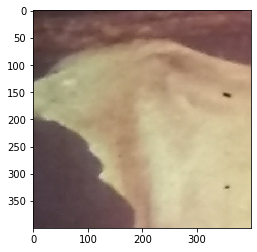

In [138]:
import matplotlib.pyplot as plt
t_img = image_patches[1, 4, 4]
t_img = tf.reshape(t_img, [ksize_rows, ksize_cols, 3])
plt.imshow(t_img)

In [5]:
for im in range(len(filenames)):
    for i in range(int(image_patches.shape[1])):
        for j in range(int(image_patches.shape[2])):
            
            img = image_patches[im, i, j]
            img = tf.reshape(img, [ksize_rows, ksize_cols, 3])
            img = tf.image.encode_jpeg(img)
            
            f = "./exported_fragments/"+filenames[im]+"-"+str(i)+"-"+str(j)+".jpg"
            print(f)
            tf.io.write_file(f, img)

./exported_fragments/46-0-0.jpg
./exported_fragments/46-0-1.jpg
./exported_fragments/46-0-2.jpg
./exported_fragments/46-0-3.jpg
./exported_fragments/46-0-4.jpg
./exported_fragments/46-0-5.jpg
./exported_fragments/46-0-6.jpg
./exported_fragments/46-0-7.jpg
./exported_fragments/46-0-8.jpg
./exported_fragments/46-0-9.jpg
./exported_fragments/46-0-10.jpg
./exported_fragments/46-0-11.jpg
./exported_fragments/46-0-12.jpg
./exported_fragments/46-0-13.jpg
./exported_fragments/46-0-14.jpg
./exported_fragments/46-0-15.jpg
./exported_fragments/46-0-16.jpg
./exported_fragments/46-0-17.jpg
./exported_fragments/46-0-18.jpg
./exported_fragments/46-0-19.jpg
./exported_fragments/46-0-20.jpg
./exported_fragments/46-0-21.jpg
./exported_fragments/46-0-22.jpg
./exported_fragments/46-0-23.jpg
./exported_fragments/46-0-24.jpg
./exported_fragments/46-0-25.jpg
./exported_fragments/46-0-26.jpg
./exported_fragments/46-0-27.jpg
./exported_fragments/46-0-28.jpg
./exported_fragments/46-0-29.jpg
./exported_fragments

./exported_fragments/46-4-8.jpg
./exported_fragments/46-4-9.jpg
./exported_fragments/46-4-10.jpg
./exported_fragments/46-4-11.jpg
./exported_fragments/46-4-12.jpg
./exported_fragments/46-4-13.jpg
./exported_fragments/46-4-14.jpg
./exported_fragments/46-4-15.jpg
./exported_fragments/46-4-16.jpg
./exported_fragments/46-4-17.jpg
./exported_fragments/46-4-18.jpg
./exported_fragments/46-4-19.jpg
./exported_fragments/46-4-20.jpg
./exported_fragments/46-4-21.jpg
./exported_fragments/46-4-22.jpg
./exported_fragments/46-4-23.jpg
./exported_fragments/46-4-24.jpg
./exported_fragments/46-4-25.jpg
./exported_fragments/46-4-26.jpg
./exported_fragments/46-4-27.jpg
./exported_fragments/46-4-28.jpg
./exported_fragments/46-4-29.jpg
./exported_fragments/46-4-30.jpg
./exported_fragments/46-4-31.jpg
./exported_fragments/46-4-32.jpg
./exported_fragments/46-4-33.jpg
./exported_fragments/46-4-34.jpg
./exported_fragments/46-4-35.jpg
./exported_fragments/46-4-36.jpg
./exported_fragments/46-4-37.jpg
./exported_f

./exported_fragments/46-7-68.jpg
./exported_fragments/46-7-69.jpg
./exported_fragments/46-7-70.jpg
./exported_fragments/46-8-0.jpg
./exported_fragments/46-8-1.jpg
./exported_fragments/46-8-2.jpg
./exported_fragments/46-8-3.jpg
./exported_fragments/46-8-4.jpg
./exported_fragments/46-8-5.jpg
./exported_fragments/46-8-6.jpg
./exported_fragments/46-8-7.jpg
./exported_fragments/46-8-8.jpg
./exported_fragments/46-8-9.jpg
./exported_fragments/46-8-10.jpg
./exported_fragments/46-8-11.jpg
./exported_fragments/46-8-12.jpg
./exported_fragments/46-8-13.jpg
./exported_fragments/46-8-14.jpg
./exported_fragments/46-8-15.jpg
./exported_fragments/46-8-16.jpg
./exported_fragments/46-8-17.jpg
./exported_fragments/46-8-18.jpg
./exported_fragments/46-8-19.jpg
./exported_fragments/46-8-20.jpg
./exported_fragments/46-8-21.jpg
./exported_fragments/46-8-22.jpg
./exported_fragments/46-8-23.jpg
./exported_fragments/46-8-24.jpg
./exported_fragments/46-8-25.jpg
./exported_fragments/46-8-26.jpg
./exported_fragments

./exported_fragments/46-11-36.jpg
./exported_fragments/46-11-37.jpg
./exported_fragments/46-11-38.jpg
./exported_fragments/46-11-39.jpg
./exported_fragments/46-11-40.jpg
./exported_fragments/46-11-41.jpg
./exported_fragments/46-11-42.jpg
./exported_fragments/46-11-43.jpg
./exported_fragments/46-11-44.jpg
./exported_fragments/46-11-45.jpg
./exported_fragments/46-11-46.jpg
./exported_fragments/46-11-47.jpg
./exported_fragments/46-11-48.jpg
./exported_fragments/46-11-49.jpg
./exported_fragments/46-11-50.jpg
./exported_fragments/46-11-51.jpg
./exported_fragments/46-11-52.jpg
./exported_fragments/46-11-53.jpg
./exported_fragments/46-11-54.jpg
./exported_fragments/46-11-55.jpg
./exported_fragments/46-11-56.jpg
./exported_fragments/46-11-57.jpg
./exported_fragments/46-11-58.jpg
./exported_fragments/46-11-59.jpg
./exported_fragments/46-11-60.jpg
./exported_fragments/46-11-61.jpg
./exported_fragments/46-11-62.jpg
./exported_fragments/46-11-63.jpg
./exported_fragments/46-11-64.jpg
./exported_fra

./exported_fragments/46-15-41.jpg
./exported_fragments/46-15-42.jpg
./exported_fragments/46-15-43.jpg
./exported_fragments/46-15-44.jpg
./exported_fragments/46-15-45.jpg
./exported_fragments/46-15-46.jpg
./exported_fragments/46-15-47.jpg
./exported_fragments/46-15-48.jpg
./exported_fragments/46-15-49.jpg
./exported_fragments/46-15-50.jpg
./exported_fragments/46-15-51.jpg
./exported_fragments/46-15-52.jpg
./exported_fragments/46-15-53.jpg
./exported_fragments/46-15-54.jpg
./exported_fragments/46-15-55.jpg
./exported_fragments/46-15-56.jpg
./exported_fragments/46-15-57.jpg
./exported_fragments/46-15-58.jpg
./exported_fragments/46-15-59.jpg
./exported_fragments/46-15-60.jpg
./exported_fragments/46-15-61.jpg
./exported_fragments/46-15-62.jpg
./exported_fragments/46-15-63.jpg
./exported_fragments/46-15-64.jpg
./exported_fragments/46-15-65.jpg
./exported_fragments/46-15-66.jpg
./exported_fragments/46-15-67.jpg
./exported_fragments/46-15-68.jpg
./exported_fragments/46-15-69.jpg
./exported_fra

./exported_fragments/46-19-2.jpg
./exported_fragments/46-19-3.jpg
./exported_fragments/46-19-4.jpg
./exported_fragments/46-19-5.jpg
./exported_fragments/46-19-6.jpg
./exported_fragments/46-19-7.jpg
./exported_fragments/46-19-8.jpg
./exported_fragments/46-19-9.jpg
./exported_fragments/46-19-10.jpg
./exported_fragments/46-19-11.jpg
./exported_fragments/46-19-12.jpg
./exported_fragments/46-19-13.jpg
./exported_fragments/46-19-14.jpg
./exported_fragments/46-19-15.jpg
./exported_fragments/46-19-16.jpg
./exported_fragments/46-19-17.jpg
./exported_fragments/46-19-18.jpg
./exported_fragments/46-19-19.jpg
./exported_fragments/46-19-20.jpg
./exported_fragments/46-19-21.jpg
./exported_fragments/46-19-22.jpg
./exported_fragments/46-19-23.jpg
./exported_fragments/46-19-24.jpg
./exported_fragments/46-19-25.jpg
./exported_fragments/46-19-26.jpg
./exported_fragments/46-19-27.jpg
./exported_fragments/46-19-28.jpg
./exported_fragments/46-19-29.jpg
./exported_fragments/46-19-30.jpg
./exported_fragments/4

./exported_fragments/46-22-58.jpg
./exported_fragments/46-22-59.jpg
./exported_fragments/46-22-60.jpg
./exported_fragments/46-22-61.jpg
./exported_fragments/46-22-62.jpg
./exported_fragments/46-22-63.jpg
./exported_fragments/46-22-64.jpg
./exported_fragments/46-22-65.jpg
./exported_fragments/46-22-66.jpg
./exported_fragments/46-22-67.jpg
./exported_fragments/46-22-68.jpg
./exported_fragments/46-22-69.jpg
./exported_fragments/46-22-70.jpg
./exported_fragments/46-23-0.jpg
./exported_fragments/46-23-1.jpg
./exported_fragments/46-23-2.jpg
./exported_fragments/46-23-3.jpg
./exported_fragments/46-23-4.jpg
./exported_fragments/46-23-5.jpg
./exported_fragments/46-23-6.jpg
./exported_fragments/46-23-7.jpg
./exported_fragments/46-23-8.jpg
./exported_fragments/46-23-9.jpg
./exported_fragments/46-23-10.jpg
./exported_fragments/46-23-11.jpg
./exported_fragments/46-23-12.jpg
./exported_fragments/46-23-13.jpg
./exported_fragments/46-23-14.jpg
./exported_fragments/46-23-15.jpg
./exported_fragments/46-

./exported_fragments/46-26-67.jpg
./exported_fragments/46-26-68.jpg
./exported_fragments/46-26-69.jpg
./exported_fragments/46-26-70.jpg
./exported_fragments/46-27-0.jpg
./exported_fragments/46-27-1.jpg
./exported_fragments/46-27-2.jpg
./exported_fragments/46-27-3.jpg
./exported_fragments/46-27-4.jpg
./exported_fragments/46-27-5.jpg
./exported_fragments/46-27-6.jpg
./exported_fragments/46-27-7.jpg
./exported_fragments/46-27-8.jpg
./exported_fragments/46-27-9.jpg
./exported_fragments/46-27-10.jpg
./exported_fragments/46-27-11.jpg
./exported_fragments/46-27-12.jpg
./exported_fragments/46-27-13.jpg
./exported_fragments/46-27-14.jpg
./exported_fragments/46-27-15.jpg
./exported_fragments/46-27-16.jpg
./exported_fragments/46-27-17.jpg
./exported_fragments/46-27-18.jpg
./exported_fragments/46-27-19.jpg
./exported_fragments/46-27-20.jpg
./exported_fragments/46-27-21.jpg
./exported_fragments/46-27-22.jpg
./exported_fragments/46-27-23.jpg
./exported_fragments/46-27-24.jpg
./exported_fragments/46-

./exported_fragments/46-30-49.jpg
./exported_fragments/46-30-50.jpg
./exported_fragments/46-30-51.jpg
./exported_fragments/46-30-52.jpg
./exported_fragments/46-30-53.jpg
./exported_fragments/46-30-54.jpg
./exported_fragments/46-30-55.jpg
./exported_fragments/46-30-56.jpg
./exported_fragments/46-30-57.jpg
./exported_fragments/46-30-58.jpg
./exported_fragments/46-30-59.jpg
./exported_fragments/46-30-60.jpg
./exported_fragments/46-30-61.jpg
./exported_fragments/46-30-62.jpg
./exported_fragments/46-30-63.jpg
./exported_fragments/46-30-64.jpg
./exported_fragments/46-30-65.jpg
./exported_fragments/46-30-66.jpg
./exported_fragments/46-30-67.jpg
./exported_fragments/46-30-68.jpg
./exported_fragments/46-30-69.jpg
./exported_fragments/46-30-70.jpg
./exported_fragments/46-31-0.jpg
./exported_fragments/46-31-1.jpg
./exported_fragments/46-31-2.jpg
./exported_fragments/46-31-3.jpg
./exported_fragments/46-31-4.jpg
./exported_fragments/46-31-5.jpg
./exported_fragments/46-31-6.jpg
./exported_fragments/

./exported_fragments/46-34-66.jpg
./exported_fragments/46-34-67.jpg
./exported_fragments/46-34-68.jpg
./exported_fragments/46-34-69.jpg
./exported_fragments/46-34-70.jpg
./exported_fragments/46-35-0.jpg
./exported_fragments/46-35-1.jpg
./exported_fragments/46-35-2.jpg
./exported_fragments/46-35-3.jpg
./exported_fragments/46-35-4.jpg
./exported_fragments/46-35-5.jpg
./exported_fragments/46-35-6.jpg
./exported_fragments/46-35-7.jpg
./exported_fragments/46-35-8.jpg
./exported_fragments/46-35-9.jpg
./exported_fragments/46-35-10.jpg
./exported_fragments/46-35-11.jpg
./exported_fragments/46-35-12.jpg
./exported_fragments/46-35-13.jpg
./exported_fragments/46-35-14.jpg
./exported_fragments/46-35-15.jpg
./exported_fragments/46-35-16.jpg
./exported_fragments/46-35-17.jpg
./exported_fragments/46-35-18.jpg
./exported_fragments/46-35-19.jpg
./exported_fragments/46-35-20.jpg
./exported_fragments/46-35-21.jpg
./exported_fragments/46-35-22.jpg
./exported_fragments/46-35-23.jpg
./exported_fragments/46-

./exported_fragments/46-38-29.jpg
./exported_fragments/46-38-30.jpg
./exported_fragments/46-38-31.jpg
./exported_fragments/46-38-32.jpg
./exported_fragments/46-38-33.jpg
./exported_fragments/46-38-34.jpg
./exported_fragments/46-38-35.jpg
./exported_fragments/46-38-36.jpg
./exported_fragments/46-38-37.jpg
./exported_fragments/46-38-38.jpg
./exported_fragments/46-38-39.jpg
./exported_fragments/46-38-40.jpg
./exported_fragments/46-38-41.jpg
./exported_fragments/46-38-42.jpg
./exported_fragments/46-38-43.jpg
./exported_fragments/46-38-44.jpg
./exported_fragments/46-38-45.jpg
./exported_fragments/46-38-46.jpg
./exported_fragments/46-38-47.jpg
./exported_fragments/46-38-48.jpg
./exported_fragments/46-38-49.jpg
./exported_fragments/46-38-50.jpg
./exported_fragments/46-38-51.jpg
./exported_fragments/46-38-52.jpg
./exported_fragments/46-38-53.jpg
./exported_fragments/46-38-54.jpg
./exported_fragments/46-38-55.jpg
./exported_fragments/46-38-56.jpg
./exported_fragments/46-38-57.jpg
./exported_fra

./exported_fragments/46-41-63.jpg
./exported_fragments/46-41-64.jpg
./exported_fragments/46-41-65.jpg
./exported_fragments/46-41-66.jpg
./exported_fragments/46-41-67.jpg
./exported_fragments/46-41-68.jpg
./exported_fragments/46-41-69.jpg
./exported_fragments/46-41-70.jpg
./exported_fragments/46-42-0.jpg
./exported_fragments/46-42-1.jpg
./exported_fragments/46-42-2.jpg
./exported_fragments/46-42-3.jpg
./exported_fragments/46-42-4.jpg
./exported_fragments/46-42-5.jpg
./exported_fragments/46-42-6.jpg
./exported_fragments/46-42-7.jpg
./exported_fragments/46-42-8.jpg
./exported_fragments/46-42-9.jpg
./exported_fragments/46-42-10.jpg
./exported_fragments/46-42-11.jpg
./exported_fragments/46-42-12.jpg
./exported_fragments/46-42-13.jpg
./exported_fragments/46-42-14.jpg
./exported_fragments/46-42-15.jpg
./exported_fragments/46-42-16.jpg
./exported_fragments/46-42-17.jpg
./exported_fragments/46-42-18.jpg
./exported_fragments/46-42-19.jpg
./exported_fragments/46-42-20.jpg
./exported_fragments/46-

./exported_fragments/18-0-10.jpg
./exported_fragments/18-0-11.jpg
./exported_fragments/18-0-12.jpg
./exported_fragments/18-0-13.jpg
./exported_fragments/18-0-14.jpg
./exported_fragments/18-0-15.jpg
./exported_fragments/18-0-16.jpg
./exported_fragments/18-0-17.jpg
./exported_fragments/18-0-18.jpg
./exported_fragments/18-0-19.jpg
./exported_fragments/18-0-20.jpg
./exported_fragments/18-0-21.jpg
./exported_fragments/18-0-22.jpg
./exported_fragments/18-0-23.jpg
./exported_fragments/18-0-24.jpg
./exported_fragments/18-0-25.jpg
./exported_fragments/18-0-26.jpg
./exported_fragments/18-0-27.jpg
./exported_fragments/18-0-28.jpg
./exported_fragments/18-0-29.jpg
./exported_fragments/18-0-30.jpg
./exported_fragments/18-0-31.jpg
./exported_fragments/18-0-32.jpg
./exported_fragments/18-0-33.jpg
./exported_fragments/18-0-34.jpg
./exported_fragments/18-0-35.jpg
./exported_fragments/18-0-36.jpg
./exported_fragments/18-0-37.jpg
./exported_fragments/18-0-38.jpg
./exported_fragments/18-0-39.jpg
./exported

./exported_fragments/18-4-6.jpg
./exported_fragments/18-4-7.jpg
./exported_fragments/18-4-8.jpg
./exported_fragments/18-4-9.jpg
./exported_fragments/18-4-10.jpg
./exported_fragments/18-4-11.jpg
./exported_fragments/18-4-12.jpg
./exported_fragments/18-4-13.jpg
./exported_fragments/18-4-14.jpg
./exported_fragments/18-4-15.jpg
./exported_fragments/18-4-16.jpg
./exported_fragments/18-4-17.jpg
./exported_fragments/18-4-18.jpg
./exported_fragments/18-4-19.jpg
./exported_fragments/18-4-20.jpg
./exported_fragments/18-4-21.jpg
./exported_fragments/18-4-22.jpg
./exported_fragments/18-4-23.jpg
./exported_fragments/18-4-24.jpg
./exported_fragments/18-4-25.jpg
./exported_fragments/18-4-26.jpg
./exported_fragments/18-4-27.jpg
./exported_fragments/18-4-28.jpg
./exported_fragments/18-4-29.jpg
./exported_fragments/18-4-30.jpg
./exported_fragments/18-4-31.jpg
./exported_fragments/18-4-32.jpg
./exported_fragments/18-4-33.jpg
./exported_fragments/18-4-34.jpg
./exported_fragments/18-4-35.jpg
./exported_fra

./exported_fragments/18-8-3.jpg
./exported_fragments/18-8-4.jpg
./exported_fragments/18-8-5.jpg
./exported_fragments/18-8-6.jpg
./exported_fragments/18-8-7.jpg
./exported_fragments/18-8-8.jpg
./exported_fragments/18-8-9.jpg
./exported_fragments/18-8-10.jpg
./exported_fragments/18-8-11.jpg
./exported_fragments/18-8-12.jpg
./exported_fragments/18-8-13.jpg
./exported_fragments/18-8-14.jpg
./exported_fragments/18-8-15.jpg
./exported_fragments/18-8-16.jpg
./exported_fragments/18-8-17.jpg
./exported_fragments/18-8-18.jpg
./exported_fragments/18-8-19.jpg
./exported_fragments/18-8-20.jpg
./exported_fragments/18-8-21.jpg
./exported_fragments/18-8-22.jpg
./exported_fragments/18-8-23.jpg
./exported_fragments/18-8-24.jpg
./exported_fragments/18-8-25.jpg
./exported_fragments/18-8-26.jpg
./exported_fragments/18-8-27.jpg
./exported_fragments/18-8-28.jpg
./exported_fragments/18-8-29.jpg
./exported_fragments/18-8-30.jpg
./exported_fragments/18-8-31.jpg
./exported_fragments/18-8-32.jpg
./exported_fragme

./exported_fragments/18-12-23.jpg
./exported_fragments/18-12-24.jpg
./exported_fragments/18-12-25.jpg
./exported_fragments/18-12-26.jpg
./exported_fragments/18-12-27.jpg
./exported_fragments/18-12-28.jpg
./exported_fragments/18-12-29.jpg
./exported_fragments/18-12-30.jpg
./exported_fragments/18-12-31.jpg
./exported_fragments/18-12-32.jpg
./exported_fragments/18-12-33.jpg
./exported_fragments/18-12-34.jpg
./exported_fragments/18-12-35.jpg
./exported_fragments/18-12-36.jpg
./exported_fragments/18-12-37.jpg
./exported_fragments/18-12-38.jpg
./exported_fragments/18-12-39.jpg
./exported_fragments/18-12-40.jpg
./exported_fragments/18-12-41.jpg
./exported_fragments/18-12-42.jpg
./exported_fragments/18-12-43.jpg
./exported_fragments/18-12-44.jpg
./exported_fragments/18-12-45.jpg
./exported_fragments/18-12-46.jpg
./exported_fragments/18-12-47.jpg
./exported_fragments/18-12-48.jpg
./exported_fragments/18-12-49.jpg
./exported_fragments/18-12-50.jpg
./exported_fragments/18-12-51.jpg
./exported_fra

./exported_fragments/18-16-22.jpg
./exported_fragments/18-16-23.jpg
./exported_fragments/18-16-24.jpg
./exported_fragments/18-16-25.jpg
./exported_fragments/18-16-26.jpg
./exported_fragments/18-16-27.jpg
./exported_fragments/18-16-28.jpg
./exported_fragments/18-16-29.jpg
./exported_fragments/18-16-30.jpg
./exported_fragments/18-16-31.jpg
./exported_fragments/18-16-32.jpg
./exported_fragments/18-16-33.jpg
./exported_fragments/18-16-34.jpg
./exported_fragments/18-16-35.jpg
./exported_fragments/18-16-36.jpg
./exported_fragments/18-16-37.jpg
./exported_fragments/18-16-38.jpg
./exported_fragments/18-16-39.jpg
./exported_fragments/18-16-40.jpg
./exported_fragments/18-16-41.jpg
./exported_fragments/18-16-42.jpg
./exported_fragments/18-16-43.jpg
./exported_fragments/18-16-44.jpg
./exported_fragments/18-16-45.jpg
./exported_fragments/18-16-46.jpg
./exported_fragments/18-16-47.jpg
./exported_fragments/18-16-48.jpg
./exported_fragments/18-16-49.jpg
./exported_fragments/18-16-50.jpg
./exported_fra

./exported_fragments/18-20-33.jpg
./exported_fragments/18-20-34.jpg
./exported_fragments/18-20-35.jpg
./exported_fragments/18-20-36.jpg
./exported_fragments/18-20-37.jpg
./exported_fragments/18-20-38.jpg
./exported_fragments/18-20-39.jpg
./exported_fragments/18-20-40.jpg
./exported_fragments/18-20-41.jpg
./exported_fragments/18-20-42.jpg
./exported_fragments/18-20-43.jpg
./exported_fragments/18-20-44.jpg
./exported_fragments/18-20-45.jpg
./exported_fragments/18-20-46.jpg
./exported_fragments/18-20-47.jpg
./exported_fragments/18-20-48.jpg
./exported_fragments/18-20-49.jpg
./exported_fragments/18-20-50.jpg
./exported_fragments/18-20-51.jpg
./exported_fragments/18-20-52.jpg
./exported_fragments/18-20-53.jpg
./exported_fragments/18-20-54.jpg
./exported_fragments/18-20-55.jpg
./exported_fragments/18-20-56.jpg
./exported_fragments/18-20-57.jpg
./exported_fragments/18-20-58.jpg
./exported_fragments/18-20-59.jpg
./exported_fragments/18-20-60.jpg
./exported_fragments/18-20-61.jpg
./exported_fra

./exported_fragments/18-24-24.jpg
./exported_fragments/18-24-25.jpg
./exported_fragments/18-24-26.jpg
./exported_fragments/18-24-27.jpg
./exported_fragments/18-24-28.jpg
./exported_fragments/18-24-29.jpg
./exported_fragments/18-24-30.jpg
./exported_fragments/18-24-31.jpg
./exported_fragments/18-24-32.jpg
./exported_fragments/18-24-33.jpg
./exported_fragments/18-24-34.jpg
./exported_fragments/18-24-35.jpg
./exported_fragments/18-24-36.jpg
./exported_fragments/18-24-37.jpg
./exported_fragments/18-24-38.jpg
./exported_fragments/18-24-39.jpg
./exported_fragments/18-24-40.jpg
./exported_fragments/18-24-41.jpg
./exported_fragments/18-24-42.jpg
./exported_fragments/18-24-43.jpg
./exported_fragments/18-24-44.jpg
./exported_fragments/18-24-45.jpg
./exported_fragments/18-24-46.jpg
./exported_fragments/18-24-47.jpg
./exported_fragments/18-24-48.jpg
./exported_fragments/18-24-49.jpg
./exported_fragments/18-24-50.jpg
./exported_fragments/18-24-51.jpg
./exported_fragments/18-24-52.jpg
./exported_fra

./exported_fragments/18-28-21.jpg
./exported_fragments/18-28-22.jpg
./exported_fragments/18-28-23.jpg
./exported_fragments/18-28-24.jpg
./exported_fragments/18-28-25.jpg
./exported_fragments/18-28-26.jpg
./exported_fragments/18-28-27.jpg
./exported_fragments/18-28-28.jpg
./exported_fragments/18-28-29.jpg
./exported_fragments/18-28-30.jpg
./exported_fragments/18-28-31.jpg
./exported_fragments/18-28-32.jpg
./exported_fragments/18-28-33.jpg
./exported_fragments/18-28-34.jpg
./exported_fragments/18-28-35.jpg
./exported_fragments/18-28-36.jpg
./exported_fragments/18-28-37.jpg
./exported_fragments/18-28-38.jpg
./exported_fragments/18-28-39.jpg
./exported_fragments/18-28-40.jpg
./exported_fragments/18-28-41.jpg
./exported_fragments/18-28-42.jpg
./exported_fragments/18-28-43.jpg
./exported_fragments/18-28-44.jpg
./exported_fragments/18-28-45.jpg
./exported_fragments/18-28-46.jpg
./exported_fragments/18-28-47.jpg
./exported_fragments/18-28-48.jpg
./exported_fragments/18-28-49.jpg
./exported_fra

./exported_fragments/18-32-12.jpg
./exported_fragments/18-32-13.jpg
./exported_fragments/18-32-14.jpg
./exported_fragments/18-32-15.jpg
./exported_fragments/18-32-16.jpg
./exported_fragments/18-32-17.jpg
./exported_fragments/18-32-18.jpg
./exported_fragments/18-32-19.jpg
./exported_fragments/18-32-20.jpg
./exported_fragments/18-32-21.jpg
./exported_fragments/18-32-22.jpg
./exported_fragments/18-32-23.jpg
./exported_fragments/18-32-24.jpg
./exported_fragments/18-32-25.jpg
./exported_fragments/18-32-26.jpg
./exported_fragments/18-32-27.jpg
./exported_fragments/18-32-28.jpg
./exported_fragments/18-32-29.jpg
./exported_fragments/18-32-30.jpg
./exported_fragments/18-32-31.jpg
./exported_fragments/18-32-32.jpg
./exported_fragments/18-32-33.jpg
./exported_fragments/18-32-34.jpg
./exported_fragments/18-32-35.jpg
./exported_fragments/18-32-36.jpg
./exported_fragments/18-32-37.jpg
./exported_fragments/18-32-38.jpg
./exported_fragments/18-32-39.jpg
./exported_fragments/18-32-40.jpg
./exported_fra

./exported_fragments/18-36-2.jpg
./exported_fragments/18-36-3.jpg
./exported_fragments/18-36-4.jpg
./exported_fragments/18-36-5.jpg
./exported_fragments/18-36-6.jpg
./exported_fragments/18-36-7.jpg
./exported_fragments/18-36-8.jpg
./exported_fragments/18-36-9.jpg
./exported_fragments/18-36-10.jpg
./exported_fragments/18-36-11.jpg
./exported_fragments/18-36-12.jpg
./exported_fragments/18-36-13.jpg
./exported_fragments/18-36-14.jpg
./exported_fragments/18-36-15.jpg
./exported_fragments/18-36-16.jpg
./exported_fragments/18-36-17.jpg
./exported_fragments/18-36-18.jpg
./exported_fragments/18-36-19.jpg
./exported_fragments/18-36-20.jpg
./exported_fragments/18-36-21.jpg
./exported_fragments/18-36-22.jpg
./exported_fragments/18-36-23.jpg
./exported_fragments/18-36-24.jpg
./exported_fragments/18-36-25.jpg
./exported_fragments/18-36-26.jpg
./exported_fragments/18-36-27.jpg
./exported_fragments/18-36-28.jpg
./exported_fragments/18-36-29.jpg
./exported_fragments/18-36-30.jpg
./exported_fragments/1

./exported_fragments/18-40-7.jpg
./exported_fragments/18-40-8.jpg
./exported_fragments/18-40-9.jpg
./exported_fragments/18-40-10.jpg
./exported_fragments/18-40-11.jpg
./exported_fragments/18-40-12.jpg
./exported_fragments/18-40-13.jpg
./exported_fragments/18-40-14.jpg
./exported_fragments/18-40-15.jpg
./exported_fragments/18-40-16.jpg
./exported_fragments/18-40-17.jpg
./exported_fragments/18-40-18.jpg
./exported_fragments/18-40-19.jpg
./exported_fragments/18-40-20.jpg
./exported_fragments/18-40-21.jpg
./exported_fragments/18-40-22.jpg
./exported_fragments/18-40-23.jpg
./exported_fragments/18-40-24.jpg
./exported_fragments/18-40-25.jpg
./exported_fragments/18-40-26.jpg
./exported_fragments/18-40-27.jpg
./exported_fragments/18-40-28.jpg
./exported_fragments/18-40-29.jpg
./exported_fragments/18-40-30.jpg
./exported_fragments/18-40-31.jpg
./exported_fragments/18-40-32.jpg
./exported_fragments/18-40-33.jpg
./exported_fragments/18-40-34.jpg
./exported_fragments/18-40-35.jpg
./exported_fragme

./exported_fragments/18-44-19.jpg
./exported_fragments/18-44-20.jpg
./exported_fragments/18-44-21.jpg
./exported_fragments/18-44-22.jpg
./exported_fragments/18-44-23.jpg
./exported_fragments/18-44-24.jpg
./exported_fragments/18-44-25.jpg
./exported_fragments/18-44-26.jpg
./exported_fragments/18-44-27.jpg
./exported_fragments/18-44-28.jpg
./exported_fragments/18-44-29.jpg
./exported_fragments/18-44-30.jpg
./exported_fragments/18-44-31.jpg
./exported_fragments/18-44-32.jpg
./exported_fragments/18-44-33.jpg
./exported_fragments/18-44-34.jpg
./exported_fragments/18-44-35.jpg
./exported_fragments/18-44-36.jpg
./exported_fragments/18-44-37.jpg
./exported_fragments/18-44-38.jpg
./exported_fragments/18-44-39.jpg
./exported_fragments/18-44-40.jpg
./exported_fragments/18-44-41.jpg
./exported_fragments/18-44-42.jpg
./exported_fragments/18-44-43.jpg
./exported_fragments/18-44-44.jpg
./exported_fragments/18-44-45.jpg
./exported_fragments/18-44-46.jpg
./exported_fragments/18-44-47.jpg
./exported_fra